In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.pyplot as patches
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import time 
import matplotlib.animation as animation
from IPython import display
import networkx as nx
import pandas as pd

In [2]:
#Number of oscillators
M = 50
omega = [0] *M
for i in range (M):
  omega[i]= 10*np.random.rand()
rand_network = nx.erdos_renyi_graph(n=M, p=0.7) # p=1 -> all-to-all connectivity
randomize_coupling= nx.to_numpy_array(rand_network)
# print(randomize_coupling.shape)

In [3]:
k = 15
def dSdt(S, t):
     theta = [0] * M          #State vatiable x
     theta_dot = [0]* M     

     for i in range (M):
         theta[i] = S[i]   
            
     for i in range (M):
       SUM=0
       for j in range(M):
         SUM = SUM + randomize_coupling[i,j]*np.sin(theta[j]-theta[i])
       theta_dot[i] = omega[i] +(k/M)* (SUM)
      #  print(theta_dot.shape)
     return theta_dot

S_0 = [0]* M
for i in range (M):
 #  S_0[i] = 1
   S_0[i]= np.random.choice([-1,1])*np.pi*np.random.rand()  

In [4]:
t = np.linspace(0, 10, 1000)
sol = odeint(dSdt, y0=S_0, t = t)
#sol = solve_ivp(dSdt, [0, 100], S_0, t_eval=t)

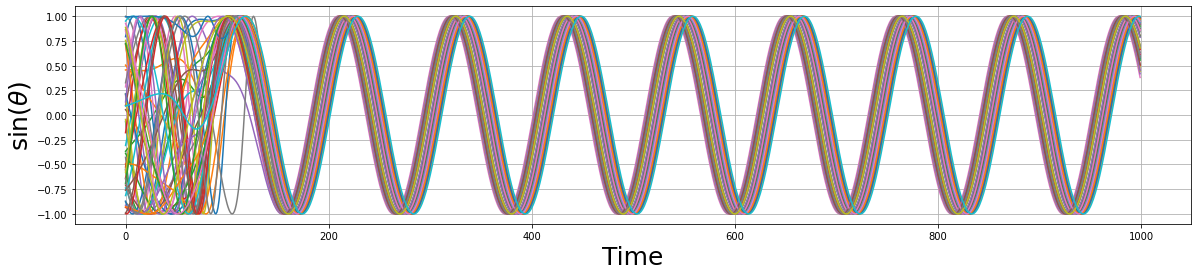

In [5]:
'''
solution = sol.y
print(type(solution))
print(sol.t.shape)
print(solution.shape)
'''
sol = sol.T
_, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.sin(sol.T))
ax.set_xlabel('Time', fontsize=25)
ax.set_ylabel(r'$\sin(\theta)$', fontsize=25)
#plt.xlim(950,999)
plt.grid()

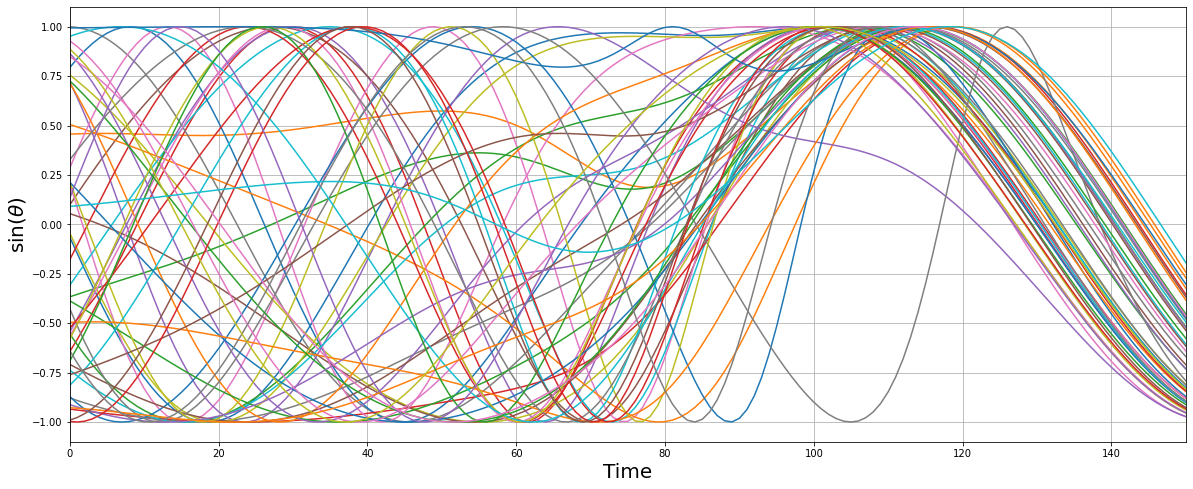

In [8]:
sol = sol.T
_, ax = plt.subplots(figsize=(20, 8))
ax.plot(np.sin(sol.T))
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel(r'$\sin(\theta)$', fontsize=20)
plt.xlim(0,150)
plt.grid()

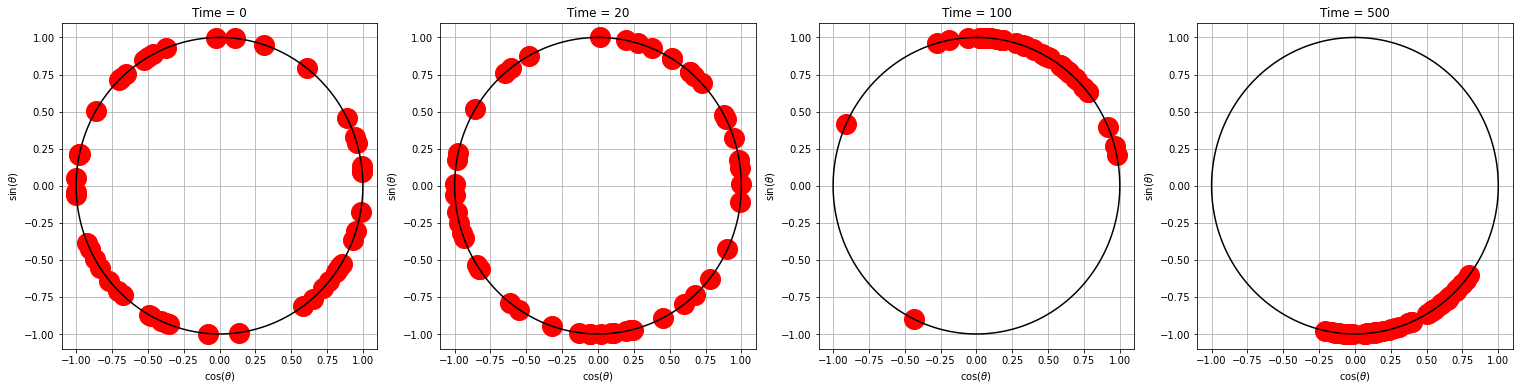

In [9]:
# Plot oscillators in complex plane at times 
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(26, 6),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',
                         })

times = [0,20, 100, 500]
circle_x = np.sin(np.linspace(0,2*np.pi , 200))
circle_y = np.cos(np.linspace(0,2*np.pi , 200))
# circle1 = patches.Circle((0.2, 0.2), radius=0.5, color='green')

for ax, time in zip(axes, times):
    ax.grid()
    ax.plot(np.cos(sol[:, time]),
            np.sin(sol[:, time]),
            'o',color = 'red', markersize=20)
    ax.plot(circle_x,circle_y,'-',color ='black',markersize =0.5)
    ax.set_title(f'Time = {time}')

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
axis = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line=[0]*M
for i in range(M):
  line[i], = axis.plot(0, 0,'o',markersize =15)

# theta1 = solution[0,:]
# theta2 = solution[1,:]
# theta3 = solution[2,:]
plt.grid()
plt.plot(circle_x,circle_y,'-',color ='black',markersize =0.5)
def animate(frame_number):
  x =[0]*M
  y =[0]*M
  for i in range(M):
    x[i] = np.cos(sol[i,frame_number])
    y[i] = np.sin(sol[i,frame_number])
    # print("(",x[i],y[i],")")
    line[i].set_data(x[i], y[i])
    # line[i].set_color('green')
 
  return line

anim = animation.FuncAnimation(fig, animate, frames=500, interval=200, blit =True)

video = anim.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

In [11]:
print(sol.shape)
print(sol)

(50, 1000)
[[-3.07616951 -2.99312315 -2.91023123 ... 52.53528844 52.59246105
  52.64963365]
 [ 0.47401743  0.47587145  0.47715298 ... 51.89826112 51.95543373
  52.01260633]
 [-0.37508842 -0.3616874  -0.34853274 ... 52.11375978 52.17093239
  52.22810499]
 ...
 [-2.4479075  -2.363824   -2.27996066 ... 58.95417619 59.0113488
  59.0685214 ]
 [ 2.05062095  2.1236665   2.19671073 ... 58.83012178 58.88729439
  58.94446699]
 [ 0.0907918   0.09419892  0.09772438 ... 51.76538013 51.82255274
  51.87972534]]


(-4.0, 20.0)

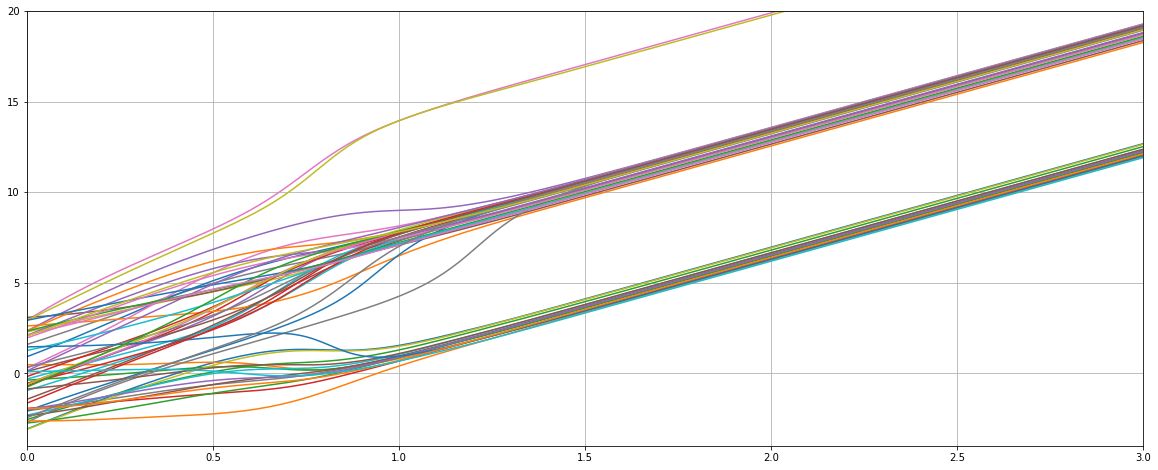

In [12]:
_, ax = plt.subplots(figsize=(20, 8))
for i in range(M):
    plt.plot(t, sol[i])
plt.grid()
plt.xlim(0,3)
plt.ylim(-4,20)

In [13]:
'''
df = pd.DataFrame(sol).T
file =df.to_excel
# ('theta.xlsx')
'''

"\ndf = pd.DataFrame(sol).T\nfile =df.to_excel\n# ('theta.xlsx')\n"